In [3]:
import sys
import os

# Add the 'back-end' directory to sys.path
sys.path.append(os.path.abspath(".."))

In [4]:
from ai.models.decisionTree import decisionTreeModel
from ai.models.logisticModel import logisticRegressionModel
from ai.models.randomforestmodel import randomForestModel
from ai.models.svm import svmModel
from ai.utils.aiUtils import X_test, y_test

import os

In [5]:
dtm = decisionTreeModel
rfm = randomForestModel
lr = logisticRegressionModel
svm = svmModel

In [6]:
y_pred_dtm = dtm.predict(X_test)
y_pred_rfm = rfm.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy Decision Tree Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_dtm)*100)
print('Accuracy Random Forest Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_rfm)*100)
print('Accuracy Logistic Regression Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_lr)*100)
print('Accuracy SVM Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_svm)*100)

Accuracy Decision Tree Model:  93.7062937062937
Accuracy Random Forest Model:  95.8041958041958
Accuracy Logistic Regression Model:  97.2027972027972
Accuracy SVM Model:  95.8041958041958


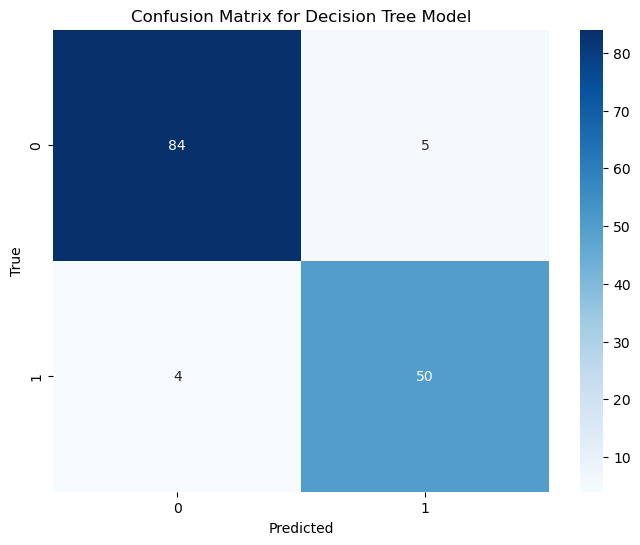

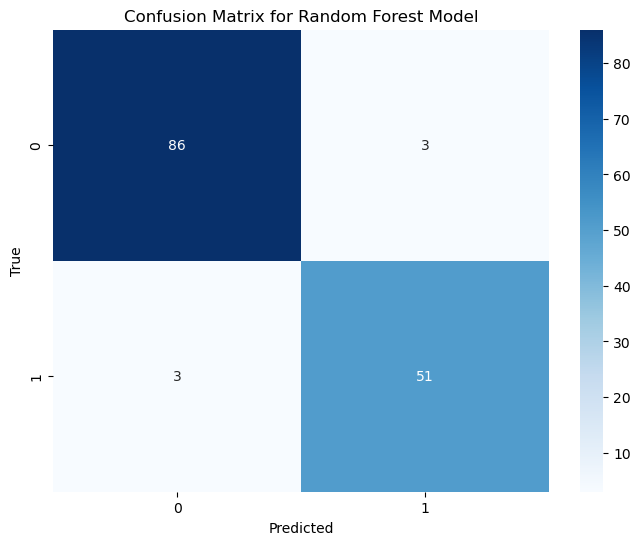

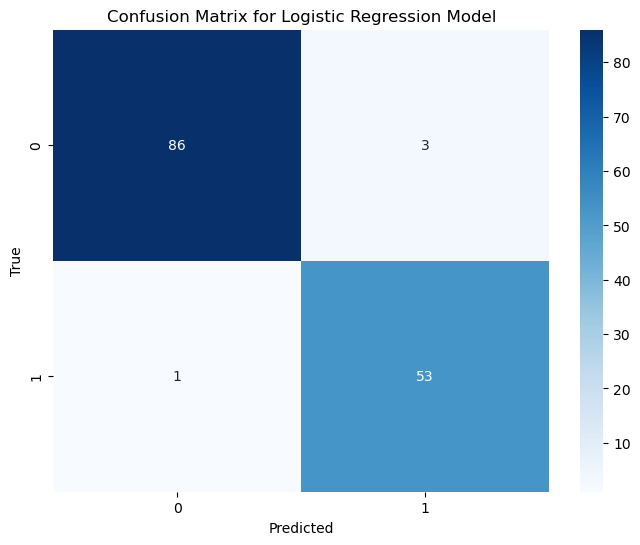

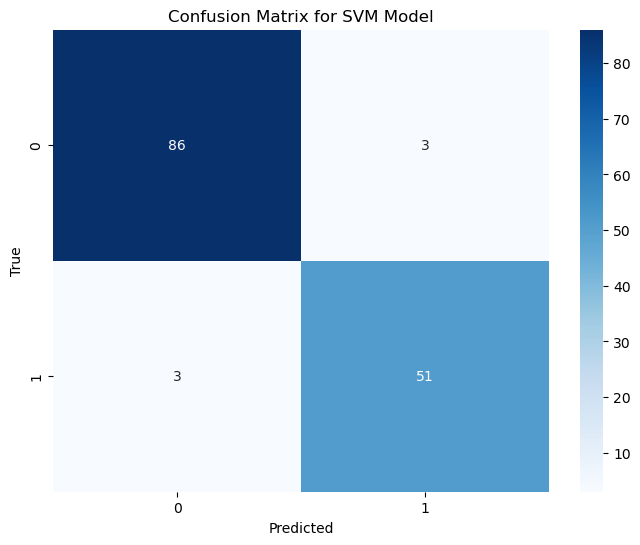

Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        89
           1       0.91      0.93      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Classification Report for Random Forest Model
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.95      0.98      0.96        54

    accuracy                          

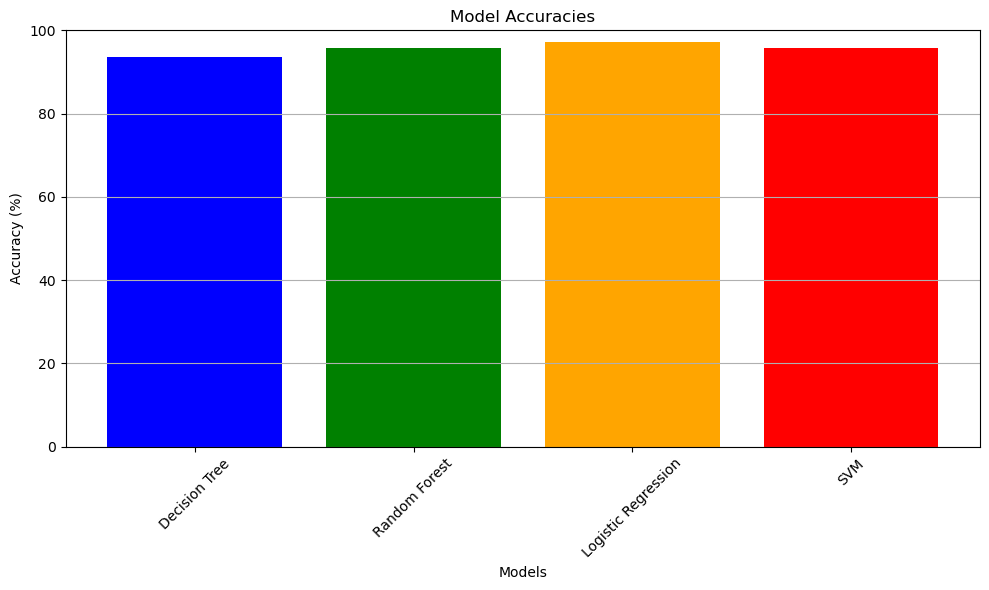

/var/folders/ly/47k7575s2rlbp9rqk_97zyk00000gn/T/ipykernel_56151/4203673890.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


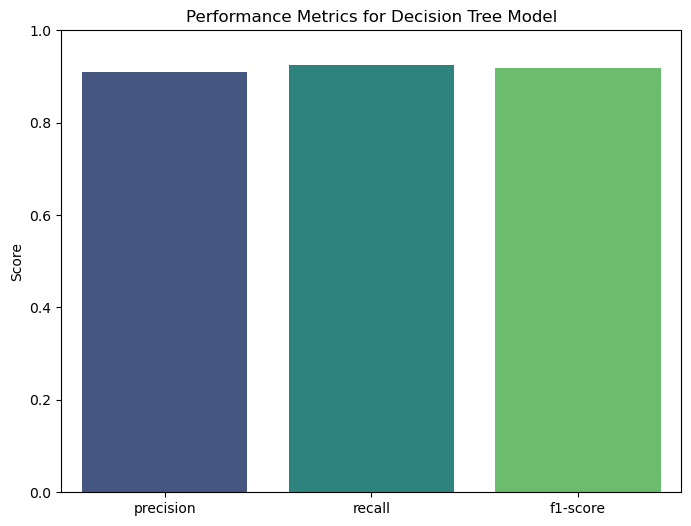

/var/folders/ly/47k7575s2rlbp9rqk_97zyk00000gn/T/ipykernel_56151/4203673890.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


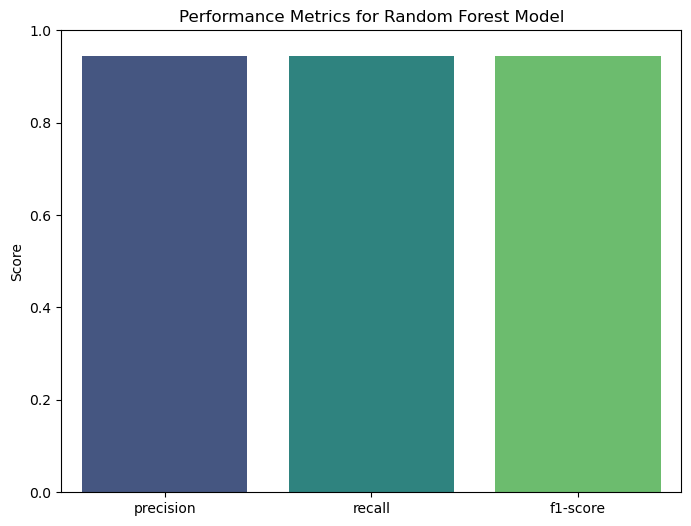

/var/folders/ly/47k7575s2rlbp9rqk_97zyk00000gn/T/ipykernel_56151/4203673890.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


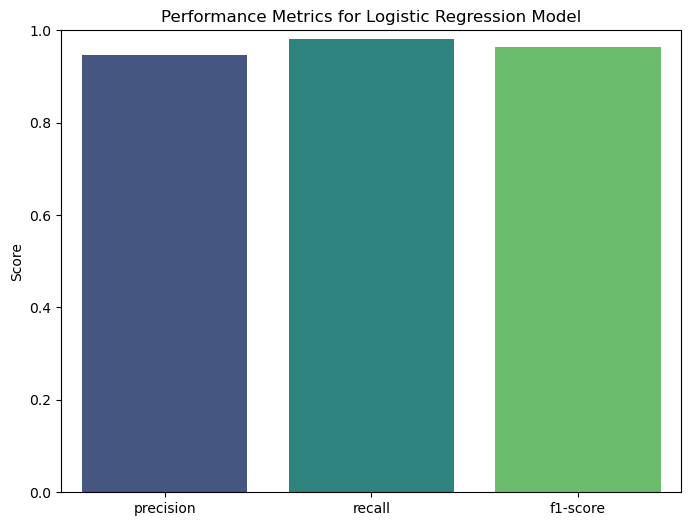

/var/folders/ly/47k7575s2rlbp9rqk_97zyk00000gn/T/ipykernel_56151/4203673890.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


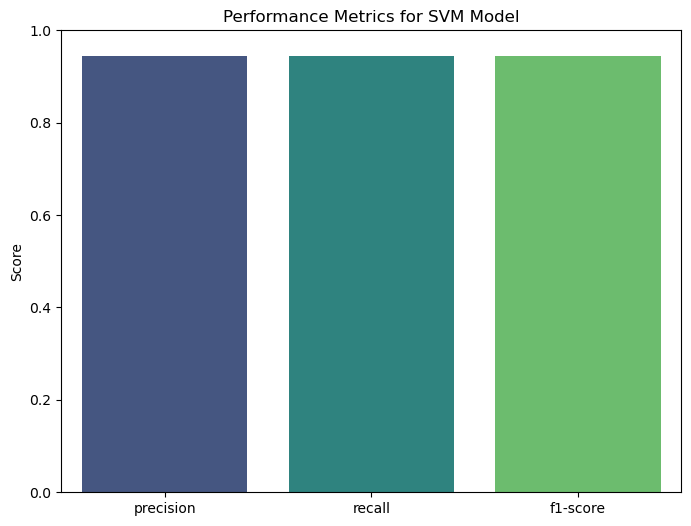

In [17]:
# Generate the Confusion Matrices
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(y_test, y_pred_dtm, "Decision Tree Model")
plot_confusion_matrix(y_test, y_pred_rfm, "Random Forest Model")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Model")
plot_confusion_matrix(y_test, y_pred_svm, "SVM Model")
# Print a classification report
from sklearn.metrics import classification_report
print("Classification Report for Decision Tree Model")
print(classification_report(y_test, y_pred_dtm))
print("Classification Report for Random Forest Model")
print(classification_report(y_test, y_pred_rfm))
print("Classification Report for Logistic Regression Model")
print(classification_report(y_test, y_pred_lr))
print("Classification Report for SVM Model")
print(classification_report(y_test, y_pred_svm))

# Create bar charts for accuracies
# Data for the bar chart
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_true=y_test, y_pred=y_pred_dtm)*100,
    accuracy_score(y_true=y_test, y_pred=y_pred_rfm)*100,
    accuracy_score(y_true=y_test, y_pred=y_pred_lr)*100,
    accuracy_score(y_true=y_test, y_pred=y_pred_svm)*100
]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Create bar charts for precision, recall, and f1-score all in one plot

# Function to plot precision, recall, and f1-score
# for each model
def plot_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    values = [report['1'][metric] for metric in metrics]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=metrics, y=values, palette='viridis')
    plt.title(f'Performance Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()
plot_metrics(y_test, y_pred_dtm, "Decision Tree Model")
plot_metrics(y_test, y_pred_rfm, "Random Forest Model")
plot_metrics(y_test, y_pred_lr, "Logistic Regression Model")
plot_metrics(y_test, y_pred_svm, "SVM Model")